# 1-3 - Foundations and Core Concepts of PyTorch - Deep Learning Introduction

## Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## Deep Learning General Overview

- Type of machine learning
- Covers all learning types (supervised/unsupervised/reinforcement learning)
- Different architectures for different puposes
  - Fully-connected neural networks
  - Convolutional neural networks
  - Recurrent neural networks
- Inspired by the structure and funtioning of the human brain
- Use multiple layers for feature extraction
- Each layer uses data from previous layers
- Learn different levels of abstraction

### Computer Vision Tasks

- Classification
  - Algorithm recognizes a dog in the image
- Classification and Object Detection
  - Algorithm recognizes a dog in the image
  - Algorithm recognizes rectangular bounding box
- Object Detection
  - It recognizes a dog and cat in the image
  - It detects the rectangular location of dog/cat
- Semantic Segmentation
  - It recognizes pixelwise location of dog/cat

### Rrecurrent Neural Networks

- Can take the context of data into account
  - Time Series Prediction Forecasting
  - Text Generation / Machine Translation


### GANs and Style Transfer

- Images can be adapted or even created with a technique called **style transfer**
  - Input is 2 images. One image is to be transformed, the style of the second image dictates the style of the transformed image
- General adversarial are a very recent technique in which images can be created from scratch that are photo realistic
  - A so-called **generator** creates to images and trys to fool a so-called **discriminator**
  - With this technique, the quality of the predicted images can be increased

## Deep Learning Modeling 101

- Start with training data, $X$
- $X$ is fed to the **neural network** which consists of **layers**
  - This is the core of the algorithm or the engine of our model
  - As a result of these calculation, we get updated **weights** of the **nodes**
- The combination of data, neural network layers and weights results in a **prediction**
  - The prediction is $\hat{y}$
- $y$ is compared to $\hat{y}$ to evaluate the quality of the predictions
  - $y$ and $\hat{y}$ are inputs to the **loss function**
  - the loss fuction evaluates how well the model performs
  - there are different types of loss functions
  - the most appropriate loss function depends on the problem at hand
  - after evaluating the loss function, we get a **loss score**
  - this loss score is used for fine tuning the weights
- The **optimizer** applies a so-called **back propogation** algorithm and updates the weights
  - Initially, the weights are set randomly and the corresponding losses are high
  - With more training loops, the weights are adapted in a way that losses are decreased
  - When the loss function is **minimized**, the predictions are as close as possible to the true values
- We can feed new X values to our trained model to get predictions
  - The model must be evaluated using data it has never seen before


## Deep Learing Performance

- Classical ML techniques work best for small datasets
- With increasing size of the available data neural networks outperform classical techniques
- 4 Reasons why Deep Learning took off
  1. More data
  2. Hardware development
    - Moore's Law and more computing power (GPUs)
    - not so much for transistors on a chip, but Deep Learning has benefitted from GPU improvements
  3. Better algorithms
    - neural networks were developed many decades ago, but they gained popularity after Google opened up the development of **TensorFlow** and made it open source
  4. Open Source: the deep learning frameworks, Python and R

## From Perceptron to Neural Network


### Perceptron

<img src='../images/image0.png'/>

- The basic building block of a neural network
- Stacking several perceptrons in line will result in a multilayer perceptron, which is effectively a neural network
- A perceptron has 4 main parts:
  1. **Input features** (this is the input layer)
  2. Each feature gets multiplied by a **weight**
  3. All the weighted inputs are added together along with the **bias** ($w_0$) to shift the output
    - This results in a **weighted sum**
  4. This value (weighted sum) is passed to an **activation function**
    - This activation function may or may not activate
    - That depends on the weight of the sum and the activation function itself
    - The result is one output value
    - The activation function:

$$
\text{output} =
\begin{cases}
1, & \text{if } \mathbf{w} \cdot \mathbf{x} + b > 0 \\
0, & \text{otherwise}
\end{cases}
$$

In [2]:
# create a simple dataset
X = np.array([
    [2, 3],
    [1, 5],
    [2, 8],
    [5, 2],
    [7, 3],
    [6, 1]
])

# labels for the dataset
# 0 for "blue" and 1 for "red"
y = np.array([0, 0, 0, 1, 1, 1])

# initialize the weights and bias
w = np.random.randn(2)
b = 0
w, b

(array([ 0.85342073, -0.08543752]), 0)

In [3]:
# perceptron step function
def predict(X):
    # calculate the linear combination
    linear_combination = np.dot(X, w) + b
    # apply the step function
    return np.where(linear_combination >= 0, 1, 0)

Epoch 1, Weights: [ 0.65342073 -0.38543752], Bias: -0.1, Errors: 1
Epoch 2, Weights: [ 0.45342073 -0.68543752], Bias: -0.2, Errors: 1
Epoch 3, Weights: [ 0.45342073 -0.68543752], Bias: -0.2, Errors: 0
Converged after 3 epochs


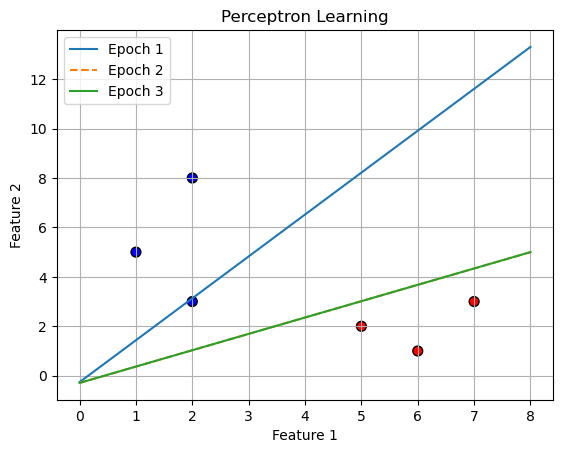

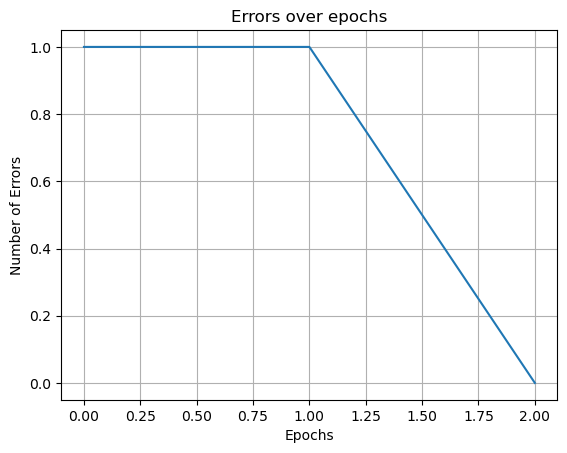

In [4]:
# plot points
fig, ax = plt.subplots()
colors = ['blue' if label == 0 else 'red' for label in y]
cmap_blues = plt.get_cmap('Blues')
ax.scatter(X[:, 0], X[:, 1], c=colors, s=50, edgecolor='k')


# Train the perceptron
learning_rate = 0.1
errors = []

# this updates the weights and bias 
#. one training example at a time
for epoch in range(20):
    total_error = 0
    for xi, yi in zip(X, y):
        y_pred = predict(xi) # predict based on the current w and b
        # update amount can be zero, negative or positive
        update = learning_rate * (yi - y_pred)
        w += update * xi # ajust weights
        b += update      # adjust bias
        total_error += int(update != 0) # count the number of errors
    errors.append(total_error)
    print(f'Epoch {epoch+1}, Weights: {w}, Bias: {b}, Errors: {total_error}')

    # plot the decision boundary
    x_values = np.linspace(0, 8, 100)
    y_values = -(w[0] * x_values + b) / w[1]
    if epoch % 2 == 0:  # plot every second epoch
        line_style = '-'
    else :
        line_style = '--'
    ax.plot(x_values, y_values, linestyle=line_style, label=f'Epoch {epoch+1}')

    if total_error == 0:
        print(f'Converged after {epoch+1} epochs')
        break
ax.legend()
plt.title('Perceptron Learning')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

# plot the error over epochs
plt.plot(errors)
plt.title('Errors over epochs')
plt.xlabel('Epochs')
plt.ylabel('Number of Errors')
plt.grid()
plt.show()

<img src='../images/image2.png'/>

- Above is a 2 layer. Typically, the input layer is not counted
- There are 3 input values, 4 hidden nodes and 3 output values

## Layer Types